In [1]:
import keras

Using TensorFlow backend.


In [2]:
# https://github.com/fchollet/keras/issues/2115

In [3]:
from keras.datasets import mnist

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
print X_train.shape
print y_train.shape

(60000, 28, 28)
(60000,)


In [6]:
import matplotlib.pyplot as plt
# So the figures are shown inline.
%matplotlib inline 
import numpy as np

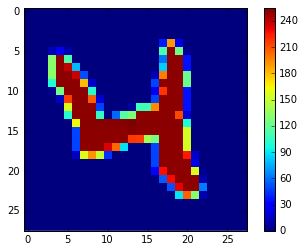

In [7]:
idx = 20
plt.imshow(np.squeeze(X_train[idx,:,:]), interpolation="None"); plt.colorbar()

In [8]:
y_train[idx]

4

In [9]:
X_train.max()

255

In [10]:
X_train.dtype

dtype('uint8')

In [11]:
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)

In [12]:
X_train.dtype

dtype('float32')

In [13]:
# Normalize so the max value is 1.
X_train /= 255

In [14]:
X_train.max()

1.0

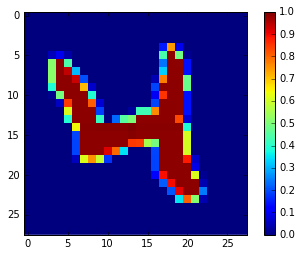

In [15]:
idx = 20
plt.imshow(np.squeeze(X_train[idx,:,:]), interpolation="None"); plt.colorbar()

In [16]:
nb_classes = 10

In [17]:
Y_train = keras.utils.np_utils.to_categorical(y_train, nb_classes)
Y_test = keras.utils.np_utils.to_categorical

In [18]:
Y_train[idx]

array([ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.])

In [19]:
X_train = X_train.reshape(X_train.shape[0], 28*28)
X_test = X_test.reshape(10000, 28*28)

In [20]:
from keras.layers import Dense, Activation

In [21]:
model = keras.models.Sequential()
model.add(Dense(32, input_shape=(X_train.shape[1],)))
model.add(Activation('relu'))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

In [22]:
from keras.optimizers import SGD

In [23]:
model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.01, momentum=0.9, nesterov=True), metrics=['accuracy'])

In [24]:
model.fit(X_train, Y_train, nb_epoch=3, batch_size=32)

Epoch 1/3
60000/60000 [==============================] - 4s - loss: 0.3352 - acc: 0.9037     
Epoch 2/3
60000/60000 [==============================] - 4s - loss: 0.1836 - acc: 0.9470     
Epoch 3/3
60000/60000 [==============================] - 4s - loss: 0.1447 - acc: 0.9575     


In [25]:
pred_classes = model.predict_classes(X_test, batch_size=100)

 9700/10000 [============================>.] - ETA: 0s

In [26]:
np.mean(pred_classes == y_test)

0.95169999999999999